# Projektarbeit Gruppe 2: Gesundheitsdaten

https://www.kaggle.com/datasets/sooyoungher/smoking-drinking-dataset

In [1]:
# Import der benötigten Bibliotheken

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Lokaler Repository Pfad auslesen zum dynamischen Laden unabhängig des Nutzers:
path = str(os.getcwd()).replace("\Projektarbeit\Aufgaben", "")

# Lesen der CSV Datei:
dataset = pd.read_csv(path + '\smoking_drinking_dataset_V0.csv')

# Umbenennen der Spalten:

dataset = dataset.rename(columns={'sex': 'Geschlecht', 'age': 'Alter', 'height': 'Größe', 'weight': 'Gewicht', 'waistline': 'Hüftumfang', 'sight_left': 'Sehkraft_links', 'sight_right': 'Sehkraft_rechts', 'hear_left': 'Hörkraft_links', 'hear_right': 'Hörkraft_rechts', 'SBP': 'Systolischer Blutdruck', 'DBP': 'Diastolischer Blutdruck', 'BLDS': 'Blutleckdetektor', 'tot_chole': 'Totale Cholesterin', 'HDL_chole': 'HDL_Cholesterin', 'LDL_chole': 'LDL_Cholesterin', 'triglyceride': 'Triglycerid', 'hemoglobin': 'Hemoglobin', 'urine_protein': 'Urin_Proteine', 'serum_creatinine': 'Serum_Kreatinin', 'SGOT_AST': 'SGOT_AST', 'SGOT_ALT': 'SGOT_ALT', 'gamma_GTP': 'gamma_GTP', 'SMK_stat_type_cd': 'Raucher_Status', 'DRK_YN': 'Trinker'})

# BMI berechnen:
body_mass_index = dataset["Gewicht"].astype(np.float64) / ((dataset["Größe"].astype(np.float64) / 100) * (dataset["Größe"].astype(np.float64) / 100))

dataset["Body-Mass-Index"] = round(body_mass_index, 3)

dataset.head()

,Geschlecht,Alter,Größe,Gewicht,Hüftumfang,Sehkraft_links,Sehkraft_rechts,Hörkraft_links,Hörkraft_rechts,Systolischer Blutdruck,...,Triglycerid,Hemoglobin,Urin_Proteine,Serum_Kreatinin,SGOT_AST,SGOT_ALT,gamma_GTP,Raucher_Status,Trinker,Body-Mass-Index
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y,25.952
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N,24.691
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N,27.548
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N,26.122
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N,22.039


# Anforderungen 2: Datentransformation

Erstellen Sie jeweils eine Visualisierung zu jedem der folgenden Charttypen. Beschreiben Sie textuell was Sie in dem Chart sehen und ggfs. eine Interpretation

- Line-Chart
- Bar-Chart
- Histogramm
- Box-Plot
- Scatter-Plot

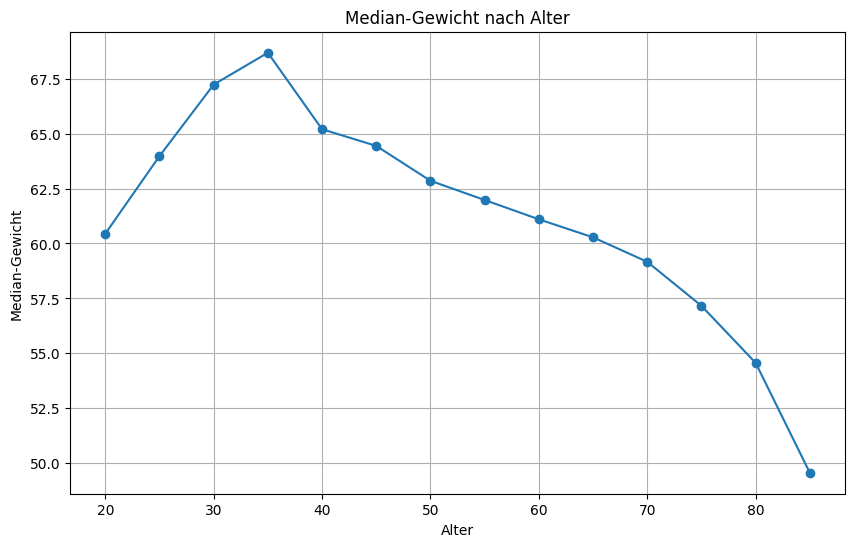

In [3]:
# Gewicht nach Alter im Median gruppieren:

avg_age = dataset.groupby('Alter')['Gewicht'].mean() 

# Liniendiagramm erstellen

plt.figure(figsize=(10, 6)) 
plt.plot(avg_age.index, avg_age.values, marker='o', linestyle='-') 

plt.xlabel('Alter') 
plt.ylabel('Median-Gewicht') 
plt.title('Median-Gewicht nach Alter') 

plt.grid(True) 
plt.show()

In [4]:
# Das Mediangewicht nimmt mit zunehmendem Alter ab. Es könnte ebenfalls interpretiert werden, 
# dass die Lebenserwartung niedriger ist, je mehr man wiegt.

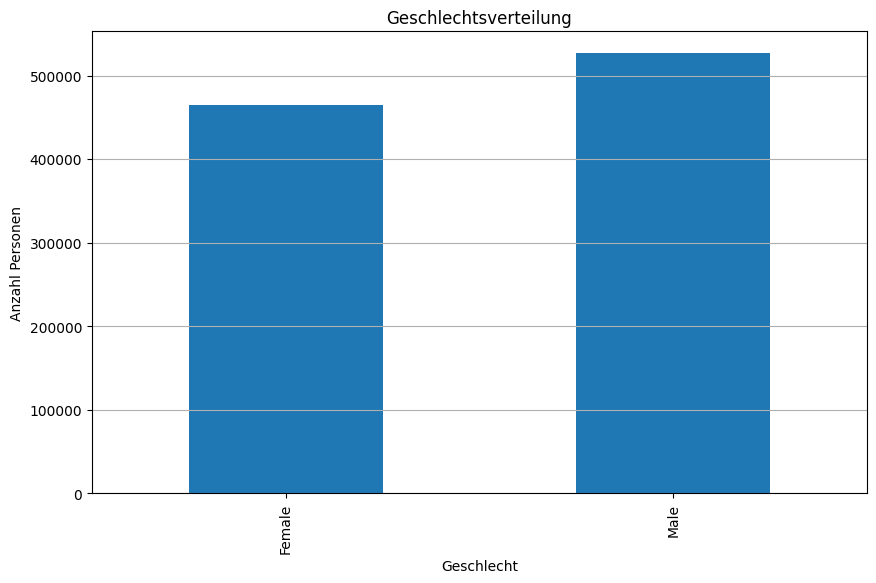

In [5]:
# Berechne relative Häufigkeit der Alterswerte in Prozent 

frequency = dataset['Geschlecht'].sort_values().value_counts(sort=False) 

# Balkendiagramm über die Altersverteilung im Datensatz erstellen und aufsteigend nach Alter sortieren 

plt.figure(figsize=(10, 6)) 
frequency.plot(kind='bar') 
plt.xlabel('Geschlecht') 
plt.ylabel('Anzahl Personen') 
plt.title('Geschlechtsverteilung') 
plt.grid(axis='y') 
plt.show()

In [6]:
# Der Anteil an Männern unter den Proband*innen ist etwas größer als der Frauenanteil.
# Der Männeranteil der gesamten Bevölkerung Südkoreas beläuft sich hingegen auf etwa 49,8 % (https://countrymeters.info/de/Republic_of_Korea).
# Dies weißt auf eine leicht verzerrte Stichprobe der Probanden hin. 

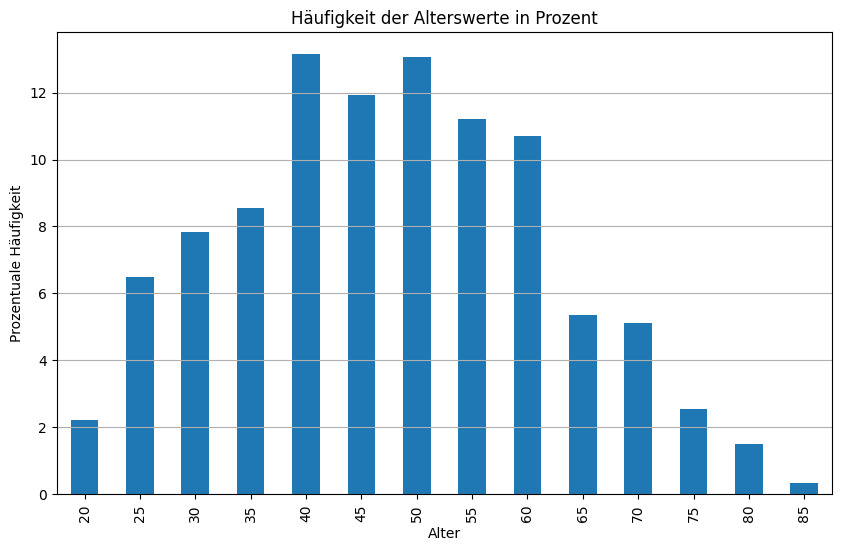

In [7]:
# Berechne relative Häufigkeit der Alterswerte in Prozent 

frequency = (dataset['Alter'].sort_values().value_counts(sort=False) / len(dataset)) * 100 

# Balkendiagramm über die Altersverteilung im Datensatz erstellen und aufsteigend nach Alter sortieren 

plt.figure(figsize=(10, 6)) 
frequency.plot(kind='bar') 
plt.xlabel('Alter') 
plt.ylabel('Prozentuale Häufigkeit') 
plt.title('Häufigkeit der Alterswerte in Prozent') 
plt.grid(axis='y') 
plt.show()

In [ ]:
# Die Altersverteilung zeigt, dass der Großteil der Probanden zwischen 35 und 65 ist.
# Beim Betrachten der Demographie Südkoreas lässt sich ein ähnlicher Trend erkennen. (https://www.wko.at/statistik/laenderprofile/lp-suedkorea.pdf)

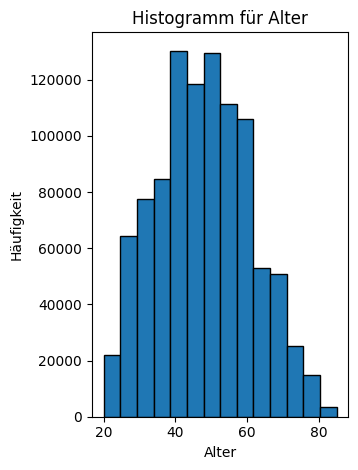

In [8]:
# Histogramm für die Spalte 'Alter' erstellen:

plt.subplot(1, 2, 2).hist(dataset['Alter'], bins=14, edgecolor='black') 
plt.xlabel('Alter') 
plt.ylabel('Häufigkeit') 
plt.title('Histogramm für Alter') 
plt.tight_layout() 
plt.show()

In [ ]:
# Diese Darstellung zeigt die selben Daten wie die vorherige. Der erkannte Trend wird hier erneut deutlich.

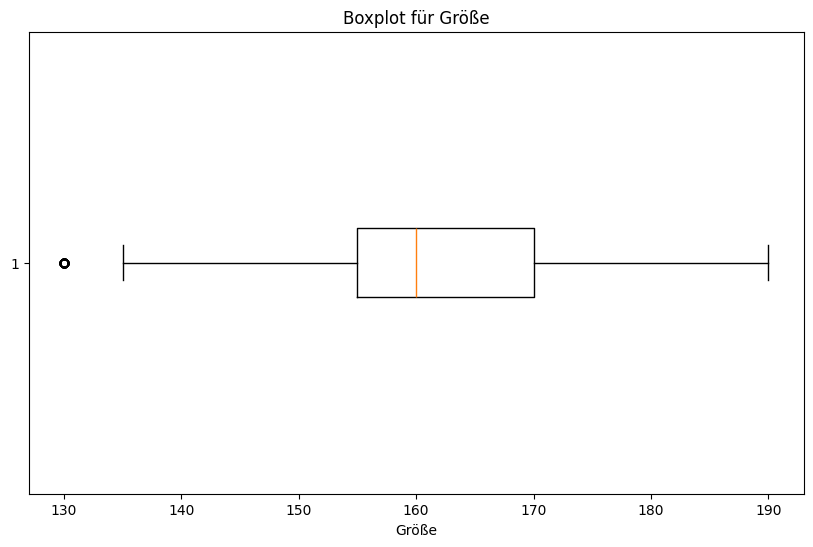

In [9]:
# Einen Boxplot erstellen:

plt.figure(figsize=(10, 6)) 
plt.boxplot(dataset['Größe'], vert=False)

plt.xlabel("Größe")
plt.title('Boxplot für Größe')

plt.show()

In [10]:
# Der Boxplot zeigt auf, dass sie die Größe der Probanden im wesentlichen zwischen 1,35 m & 1,90 m verteilt. Ein Ausreißer findet sich bei etwa 1,30 m.
# 50 % der Probanden haben eine Größe zwischen 1,55 m & 1,70 m und der Mittelwert leigt bei 1,60 m.

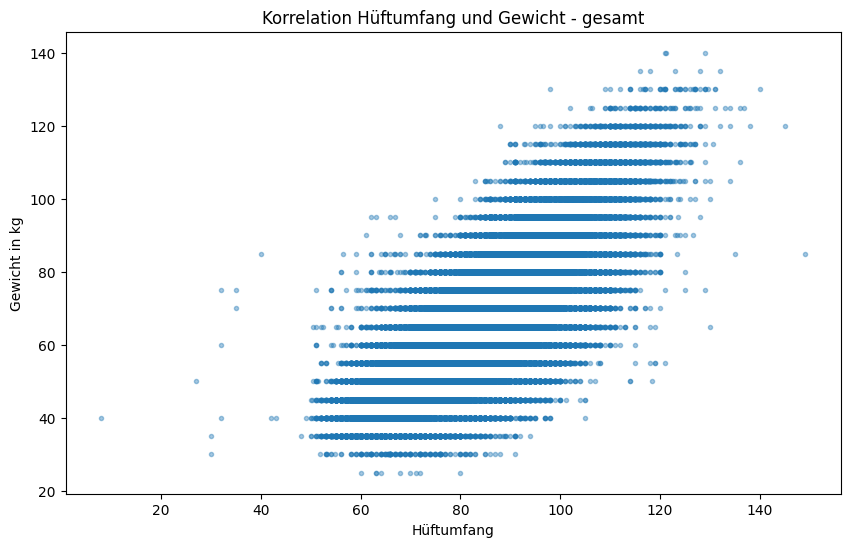

In [17]:
filtered_dataset = dataset[dataset['Hüftumfang'] < 900]

fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(x=filtered_dataset['Hüftumfang'],y=filtered_dataset['Gewicht'], marker='.', alpha=0.4)
plt.xlabel('Hüftumfang')
plt.ylabel('Gewicht in kg')
plt.title('Korrelation Hüftumfang und Gewicht - gesamt')
plt.show()

In [ ]:
# Die Grafik zeigt auf, dass es eine Korrelation zwischen dem Gewicht und dem Hüftumfang eines Probanden gibt.
# Pauschal kann gesagt werden: Je höher das Gewicht, desto größer der Hüftumfang.

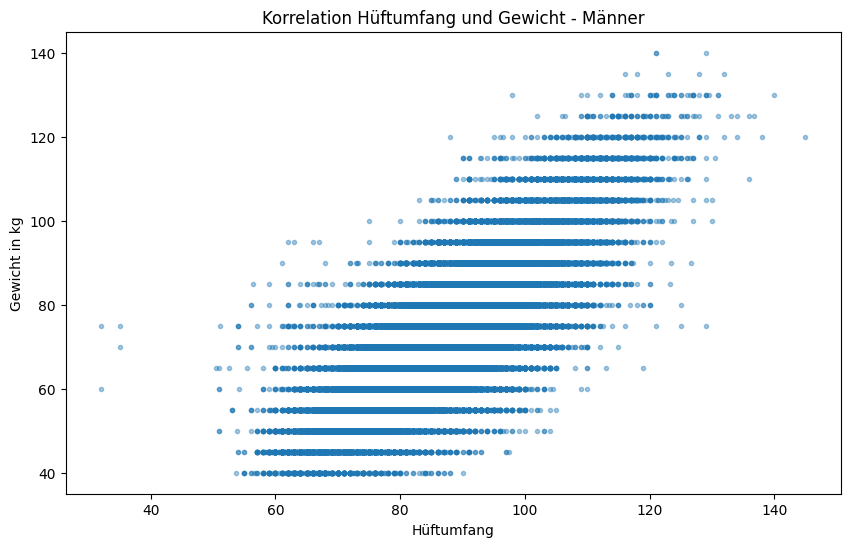

In [18]:
filtered_dataset = dataset[dataset['Hüftumfang'] < 900]

male = filtered_dataset[filtered_dataset['Geschlecht'] == 'Male']

fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(x=male['Hüftumfang'],y=male['Gewicht'], marker='.', alpha=0.4)
plt.xlabel('Hüftumfang')
plt.ylabel('Gewicht in kg')
plt.title('Korrelation Hüftumfang und Gewicht - Männer')
plt.show()

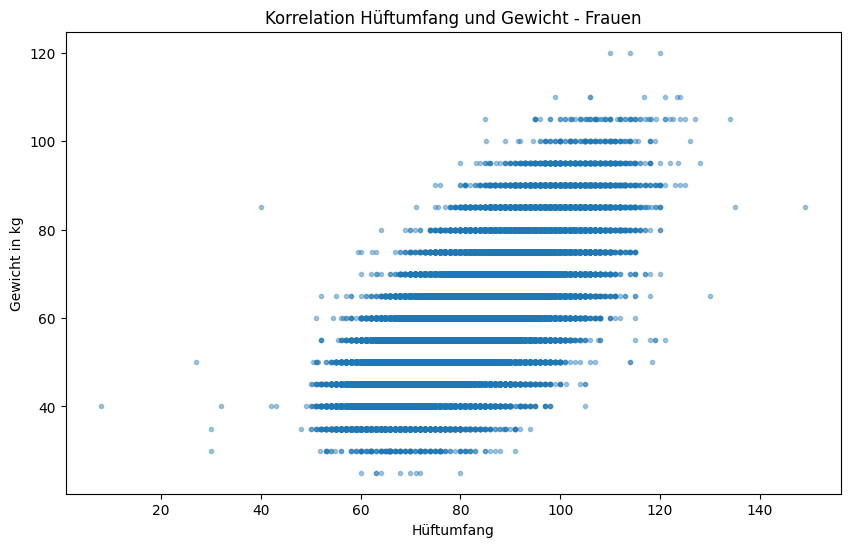

In [19]:
filtered_dataset = dataset[dataset['Hüftumfang'] < 900]

female = filtered_dataset[filtered_dataset['Geschlecht'] == 'Female']

fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(x=female['Hüftumfang'],y=female['Gewicht'], marker='.', alpha=0.4)
plt.xlabel('Hüftumfang')
plt.ylabel('Gewicht in kg')
plt.title('Korrelation Hüftumfang und Gewicht - Frauen')
plt.show()

In [ ]:
# Vergleicht man nun Männer und Frauen zeigt sich, dass die Verteilung bei den Frauen grundsätzlich konzentrierter ist als bei den Männern.

Sortieren Sie den Datensatz entweder dauerhaft oder für eine bestimmte Analyse - warum ist diese Sortierung sinnvoll?

In [20]:
# Sortieren des Dataframes:

sorted_df = dataset.sort_values(by='Alter')
sorted_df.head()

# Eine Sortierung ergibt Sinn, zur besseren Übersicht über die Daten.
# Zudem kann dies zum Filtern sinnvoll sein (Top N,...).
# Bei der Visualisierung kann eine Sortierung für Übersichtlichkeit sorgen.

,Geschlecht,Alter,Größe,Gewicht,Hüftumfang,Sehkraft_links,Sehkraft_rechts,Hörkraft_links,Hörkraft_rechts,Systolischer Blutdruck,...,Triglycerid,Hemoglobin,Urin_Proteine,Serum_Kreatinin,SGOT_AST,SGOT_ALT,gamma_GTP,Raucher_Status,Trinker,Body-Mass-Index
611351,Male,20,180,65,72.0,1.5,1.5,1.0,1.0,110.0,...,60.0,13.9,1.0,1.1,22.0,19.0,14.0,1.0,Y,20.062
513844,Male,20,175,65,75.0,0.8,0.8,1.0,1.0,153.0,...,2527.0,18.3,3.0,0.9,16.0,13.0,37.0,1.0,Y,21.224
356547,Male,20,170,65,77.0,0.9,0.9,1.0,1.0,129.0,...,59.0,15.0,1.0,0.9,19.0,12.0,11.0,1.0,N,22.491
665411,Female,20,155,45,69.0,0.9,1.0,1.0,1.0,111.0,...,35.0,13.9,1.0,0.7,17.0,6.0,14.0,1.0,N,18.730
845242,Male,20,170,65,78.0,0.9,1.5,1.0,1.0,108.0,...,37.0,16.2,1.0,1.0,21.0,16.0,17.0,1.0,N,22.491


Erstellen Sie eine statistische Zusammenfassung von mindestens 1 Spalte.

In [21]:
# Statistische Zusammenfassung einer Spalte:

summary = dataset['Gewicht'].describe()

print(summary)

count    991346.000000
mean         63.284050
std          12.514241
min          25.000000
25%          55.000000
50%          60.000000
75%          70.000000
max         140.000000
Name: Gewicht, dtype: float64


Führen Sie mindestens eine Gruppierung durch - warum war diese sinnvoll?

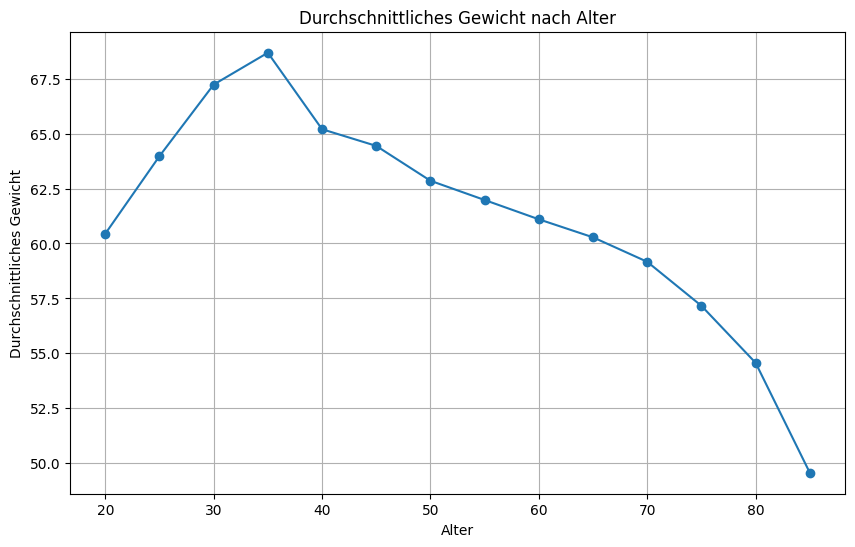

In [22]:
# Gruppierung zur Berechnung des durchschnittlichen Alters:

avg_age = dataset.groupby('Alter')['Gewicht'].mean()

# Liniendiagramm erstellen

plt.figure(figsize=(10, 6)) 
plt.plot(avg_age.index, avg_age.values, marker='o', linestyle='-') 

plt.xlabel('Alter') 
plt.ylabel('Durchschnittliches Gewicht') 
plt.title('Durchschnittliches Gewicht nach Alter') 

plt.grid(True) 
plt.show()


# Die Gruppierung war sinnvoll, um z.B. alle Proband*innen zu ihrem Alter zu gruppieren.

Dokumentieren Sie jeweils mindestens eine Erkenntnis bzgl. Datenstruktur, Daten und geschäftliche Domäne.


#1 - Datenstruktur / Daten

Die Daten beinhalten fast ausschließlich numerische Werte. Es gibt keine Anamnese zu dem Kunden, die ausführliche Informationen über den Gesundheitszustand offenlegen. Informationen über Vorerkrankungen oder chronische Erkrankungen werden nicht aufgeführt. 


#2 - Geschäftliche Domäne 

Der Datensatz gibt ausführliche Informationen über den Gesundheitszustand des Kunden zum Zeitpunkt der Aufnahme, die für die versicherung von bedeutung sind. Es müssen jedoch einige Annahmen wie z.B erhöhter Blutdruck = höheres Risiko für Herzkreislauferkrankungen. 